# Price Elasticity Modeling

This notebook analyzes price elasticity of demand using the NYC Taxi dataset. Elasticity measures how demand responds to price changes (a critical component for the dynamic pricing simulator)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Import project modules
import sys
sys.path.append('..')
from src.features.elasticity import estimate_price_elasticity, calculate_optimal_prices, visualize_elasticity

# Load processed data
df = pd.read_csv('../data/processed/processed_taxi_data.csv')

# Convert datetime columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

## 1. Overall Price Elasticity Estimation

c:\Projects\Dynamic-Pricing-Simulator-Project\notebooks\..\src\features\elasticity.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p_value': sm_model.pvalues[1],
c:\Projects\Dynamic-Pricing-Simulator-Project\notebooks\..\src\features\elasticity.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'std_error': sm_model.bse[1],
c:\Projects\Dynamic-Pricing-Simulator-Project\notebooks\..\src\features\elasticity.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

,segment,elasticity,r2,p_value,std_error,sample_size
0,overall,-6.099367,0.518108,7.336490e-05,1.254118,24
1,peak,-6.780440,0.221073,3.466967e-01,6.363684,6
2,offpeak,-7.867368,0.805164,4.485766e-07,0.967524,18
3,weekend,-3.826152,0.474912,1.957951e-04,0.857749,24


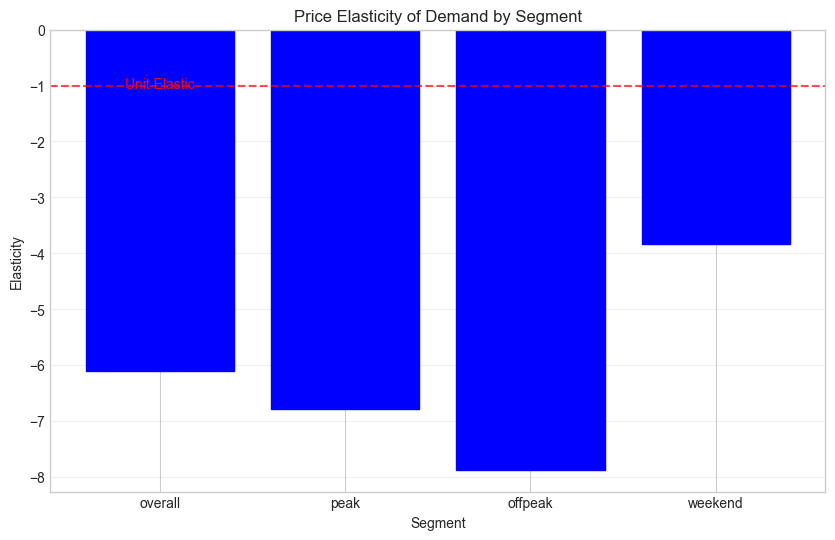

In [3]:
# Estimate price elasticity for different segments
elasticity_results = estimate_price_elasticity(df)

# Display results
elasticity_df = pd.DataFrame({
    'segment': list(elasticity_results.keys()),
    'elasticity': [e['elasticity'] for e in elasticity_results.values()],
    'r2': [e['r2'] for e in elasticity_results.values()],
    'p_value': [e['p_value'] for e in elasticity_results.values()],
    'std_error': [e['std_error'] for e in elasticity_results.values()],
    'sample_size': [e['sample_size'] for e in elasticity_results.values()]
})

display(elasticity_df)

# Create visualizations
output_dir = Path('../output/elasticity_analysis')
output_dir.mkdir(parents=True, exist_ok=True)
visualize_elasticity(elasticity_results, save_dir=output_dir)

## 2. Hourly Elasticity Analysis

C:\Users\Nethmi\AppData\Local\Temp\ipykernel_8072\2599306935.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p_value': sm_model.pvalues[1] if len(sm_model.pvalues) > 1 else np.nan,
C:\Users\Nethmi\AppData\Local\Temp\ipykernel_8072\2599306935.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'std_error': sm_model.bse[1] if len(sm_model.bse) > 1 else np.nan,
C:\Users\Nethmi\AppData\Local\Temp\ipykernel_8072\2599306935.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

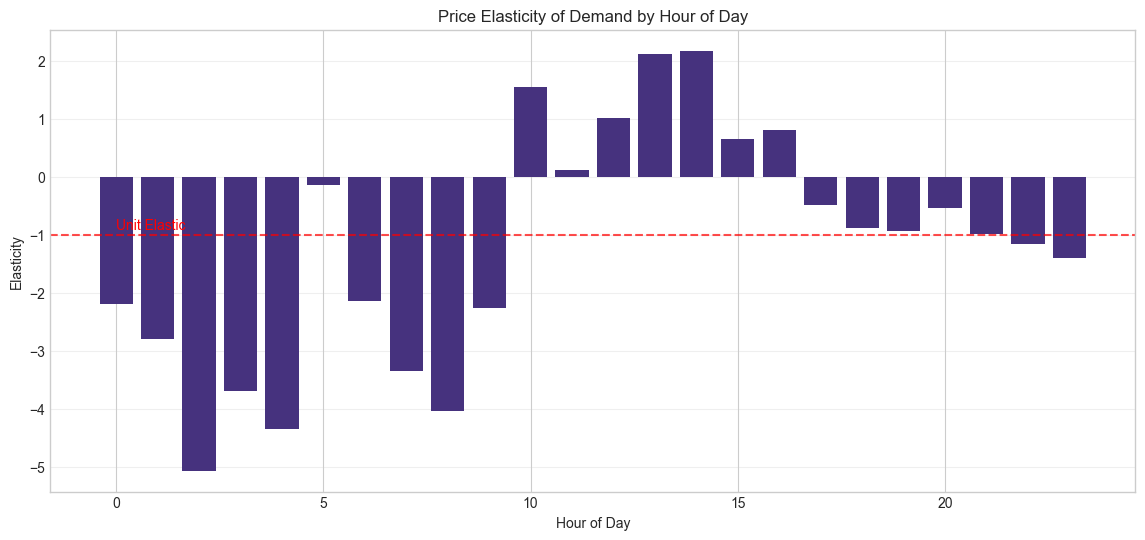

,hour,elasticity,r2,p_value,std_error,sample_size
0,0,-2.180756,0.558049,0.053653,0.867906,7
1,1,-2.794546,0.493918,0.078200,1.265054,7
2,2,-5.062026,0.705387,0.018043,1.463024,7
3,3,-3.687680,0.516711,0.068727,1.594951,7
4,4,-4.342453,0.738506,0.013188,1.155590,7
5,5,-0.133211,0.007744,0.851184,0.674347,7
6,6,-2.142760,0.727744,0.014659,0.586122,7
7,7,-3.342168,0.792282,0.007242,0.765317,7
8,8,-4.027179,0.717646,0.016131,1.129686,7
9,9,-2.255575,0.108499,0.470642,2.891474,7


In [4]:
# Create hour segments for more granular analysis
hour_segments = {}
for hour in range(24):
    hour_segments[f'hour_{hour}'] = df[df['hour'] == hour]

# Estimate elasticity for each hour
hourly_elasticities = []

for hour in range(24):
    hour_data = df[df['hour'] == hour]
    
    # Group by day to get price and demand variation within this hour
    daily_data = hour_data.groupby('day_of_week').agg({
        'fare_amount': 'mean',
        'pickup_datetime': 'count'
    }).rename(columns={'pickup_datetime': 'demand'}).reset_index()
    
    # Need at least 3 data points for regression
    if len(daily_data) >= 3:
        # Log transform
        daily_data['log_price'] = np.log(daily_data['fare_amount'])
        daily_data['log_demand'] = np.log(daily_data['demand'])
        
        # Regression
        X = daily_data[['log_price']]
        y = daily_data['log_demand']
        
        try:
            model = LinearRegression()
            model.fit(X, y)
            
            # For statistical significance
            X_sm = sm.add_constant(X)
            sm_model = sm.OLS(y, X_sm).fit()
            
            hourly_elasticities.append({
                'hour': hour,
                'elasticity': model.coef_[0],
                'r2': model.score(X, y),
                'p_value': sm_model.pvalues[1] if len(sm_model.pvalues) > 1 else np.nan,
                'std_error': sm_model.bse[1] if len(sm_model.bse) > 1 else np.nan,
                'sample_size': len(daily_data)
            })
        except:
            # Handle potential errors (e.g., perfect collinearity)
            hourly_elasticities.append({
                'hour': hour,
                'elasticity': np.nan,
                'r2': np.nan,
                'p_value': np.nan,
                'std_error': np.nan,
                'sample_size': len(daily_data)
            })
    else:
        # Not enough data
        hourly_elasticities.append({
            'hour': hour,
            'elasticity': np.nan,
            'r2': np.nan,
            'p_value': np.nan,
            'std_error': np.nan,
            'sample_size': len(daily_data)
        })

# Convert to DataFrame
hourly_elasticity_df = pd.DataFrame(hourly_elasticities)

# Plot hourly elasticities
plt.figure(figsize=(14, 6))
plt.bar(hourly_elasticity_df['hour'], hourly_elasticity_df['elasticity'])
plt.axhline(y=-1, color='r', linestyle='--', alpha=0.7)
plt.text(0, -0.9, 'Unit Elastic', color='r')
plt.title('Price Elasticity of Demand by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Elasticity')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Display results
display(hourly_elasticity_df)

## 3. Calculate Optimal Price Multipliers

,segment,elasticity,optimal_multiplier,is_elastic
0,overall,-6.099367,1.196103,True
1,peak,-6.780440,1.172997,True
2,offpeak,-7.867368,1.145616,True
3,weekend,-3.826152,1.353838,True


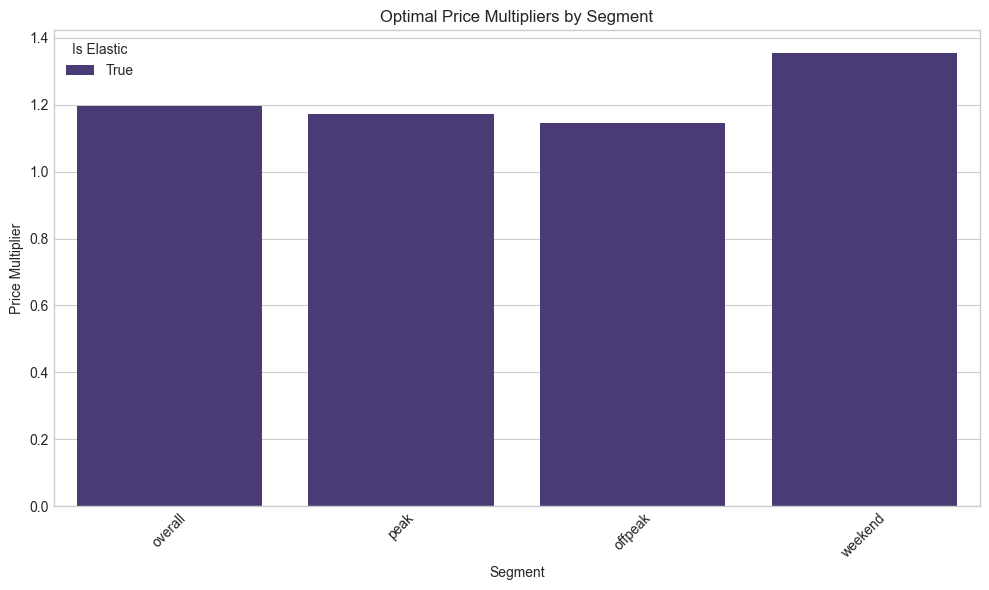

In [5]:
# Calculate optimal prices based on elasticity estimates
optimal_prices = calculate_optimal_prices(elasticity_results)

# Display results
optimal_price_df = pd.DataFrame({
    'segment': list(optimal_prices.keys()),
    'elasticity': [p['elasticity'] for p in optimal_prices.values()],
    'optimal_multiplier': [p['optimal_multiplier'] for p in optimal_prices.values()],
    'is_elastic': [p['is_elastic'] for p in optimal_prices.values()]
})

display(optimal_price_df)

# plot optimal price multipliers
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='segment', y='optimal_multiplier', hue='is_elastic', data=optimal_price_df)
plt.title('Optimal Price Multipliers by Segment')
plt.xlabel('Segment')
plt.ylabel('Price Multiplier')
plt.xticks(rotation=45)
plt.legend(title='Is Elastic')
plt.tight_layout()
plt.show()

## 4. Validation: Price-Demand Curve

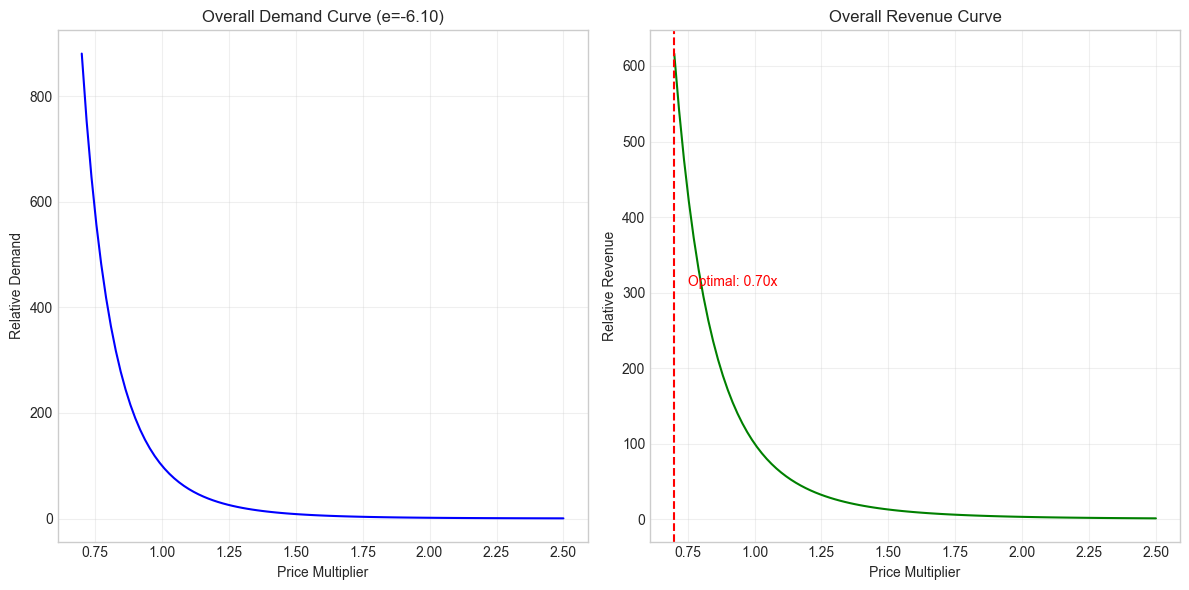

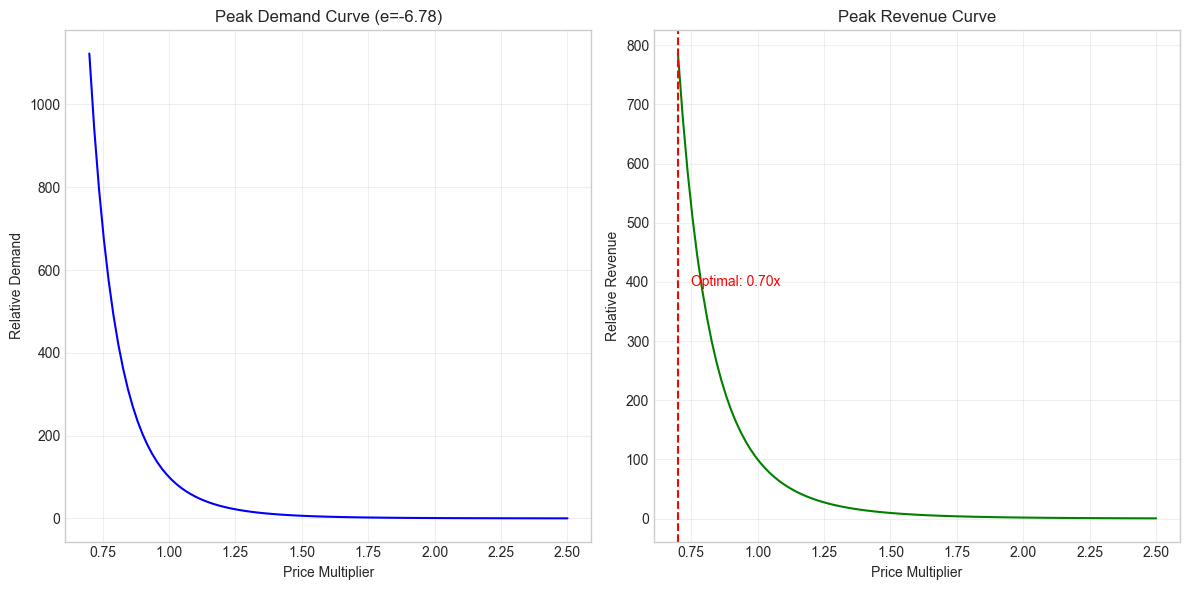

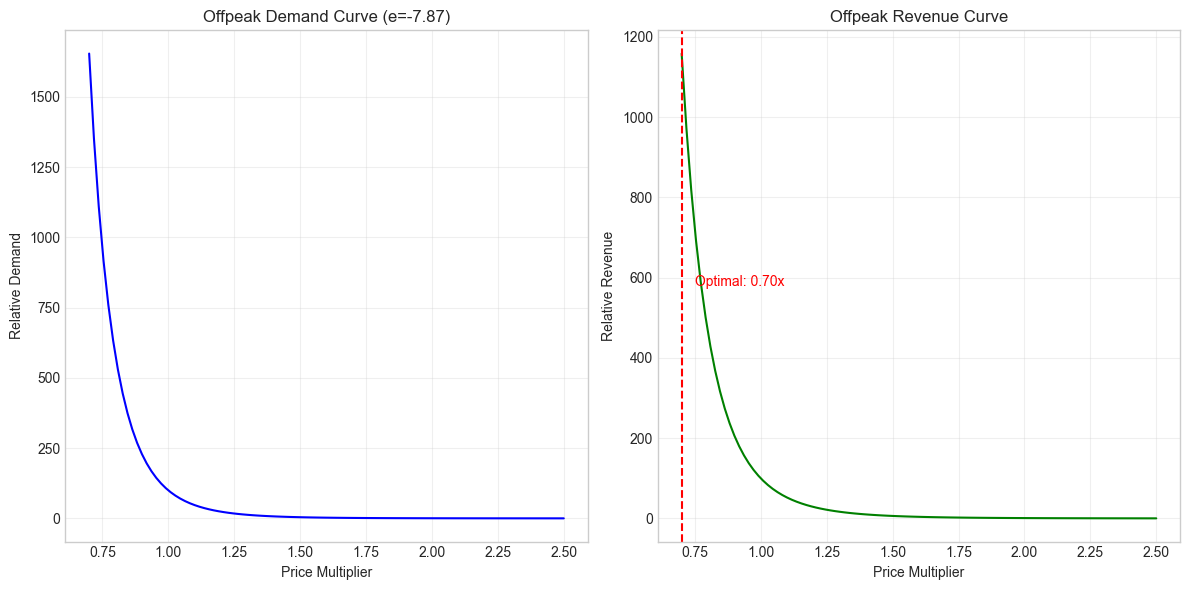

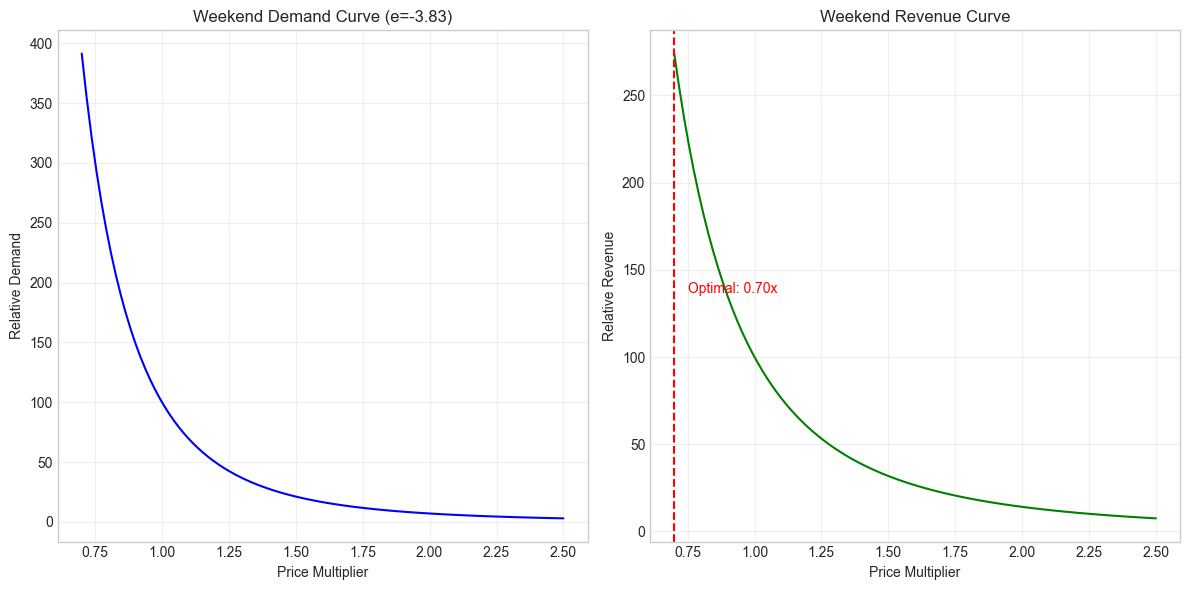

In [6]:
# Visualize the price-demand relationship for different segments
for segment, results in elasticity_results.items():
    elasticity = results['elasticity']
    
    # Generate points on the demand curve
    price_multiplier_range = np.linspace(0.7, 2.5, 100) # The range 0.7x - 2.5x is based on real-world pricing strategies in ride-sharing services. 
    # Can be adjusted based on business needs, customer reactions
    demand_values = 100 * (price_multiplier_range ** elasticity) # D = 100 x P^elasticity 
    revenue_values = demand_values * price_multiplier_range # R = D x P
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Plot demand curve
    plt.subplot(1, 2, 1)
    plt.plot(price_multiplier_range, demand_values, 'b-')
    plt.title(f'{segment.capitalize()} Demand Curve (e={elasticity:.2f})')
    plt.xlabel('Price Multiplier')
    plt.ylabel('Relative Demand')
    plt.grid(True, alpha=0.3)
    
    # Plot revenue curve
    plt.subplot(1, 2, 2)
    plt.plot(price_multiplier_range, revenue_values, 'g-')
    
    # Find and mark revenue-maximizing price
    max_revenue_idx = np.argmax(revenue_values)
    optimal_price = price_multiplier_range[max_revenue_idx] # goal is to revenue maximization
    plt.axvline(x=optimal_price, color='r', linestyle='--')
    plt.text(optimal_price+0.05, revenue_values.max()*0.5, 
             f'Optimal: {optimal_price:.2f}x', color='r')
    
    plt.title(f'{segment.capitalize()} Revenue Curve')
    plt.xlabel('Price Multiplier')
    plt.ylabel('Relative Revenue')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 5. Export Elasticity Data for Modeling

In [7]:
# Save elasticity results
elasticity_df.to_csv('../data/processed/elasticity_estimates.csv', index=False)
optimal_price_df.to_csv('../data/processed/optimal_price_multipliers.csv', index=False)

# Also save hourly elasticities
hourly_elasticity_df.to_csv('../data/processed/hourly_elasticity_estimates.csv', index=False)

print("Elasticity data exported successfully.")

Elasticity data exported successfully.


## 6. Conclusions

- The demand for ride-sharing services is highly elastic across different segments, as indicated by the elasticity values being much lower than -1.
- The off-peak segment has the highest elasticity, meaning demand is highly sensitive to price changes, while weekends are relatively less elastic.
- During late-night and early morning hours, demand is highly elastic, implying that price reductions could significantly increase ridership.
- In contrast, midday and afternoon hours show lower or even positive elasticity, suggesting that demand is more stable and less affected by price changes.
- The calculated optimal price multipliers suggest that prices should be relatively higher during weekends compared to other segments.
- Despite high elasticity in off-peak hours, the optimal price multiplier is lower, indicating that aggressive price reductions might be necessary to stimulate demand.
- The revenue-maximizing multiplier for all the demand segments are approximately 0.70x the base fare, meaning that a 30% price reduction would yield the highest revenue.